In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
data = pd.read_csv(r'/content/parkinsons_disease_data.csv')

print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52       0          0               0  15.454557        0   
4       3062   87       0          0               1  18.616042        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0            5.108241          1.380660     3.893969  ...   
1            6.027648          8.409804     8.513428  ...   
2            2.242135          0.213275     6.498805  ...   
3            5.997788          1.375045     6.715033  ...   
4            9.775243          1.188607     4.657572  ...   

   FunctionalAssessment  Tremor  Rigidity  Bradykinesia  PosturalInstability  \
0              1.572427       1         0             0            

In [ ]:
# Remove unnecessary columns
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [ ]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

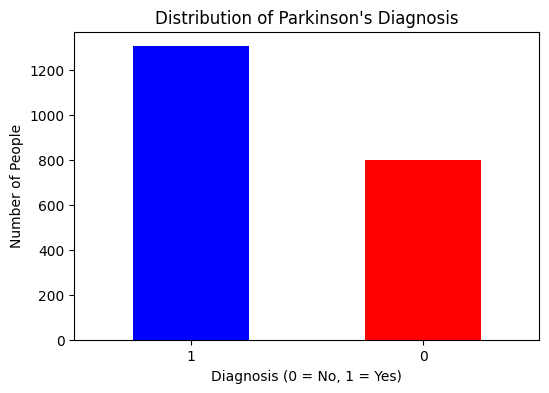

In [ ]:
# Count the number of occurrences of diagnosis (0 and 1)
diagnosis_counts = data['Diagnosis'].value_counts()

# Plotting the counts
plt.figure(figsize=(6, 4))
diagnosis_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Parkinson\'s Diagnosis')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

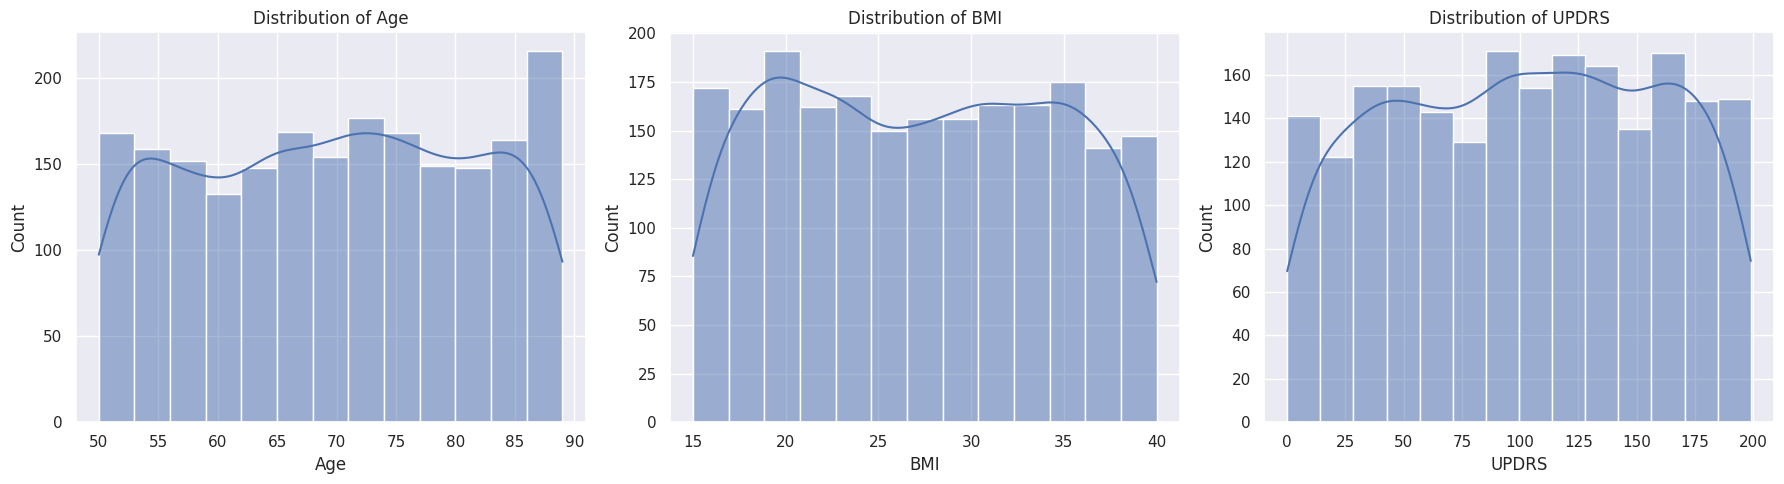

In [ ]:
# Set a theme for the plots
sns.set_theme(style="darkgrid")  # You can change "darkgrid" to any theme like "whitegrid", "dark", etc.

# Create a 1 row, 3 column grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of Age
sns.histplot(data['Age'], kde=True, ax=axes[0])  # Use axes[0] for the first subplot
axes[0].set_title('Distribution of Age')

# Distribution of BMI
sns.histplot(data['BMI'], kde=True, ax=axes[1])  # Use axes[1] for the second subplot
axes[1].set_title('Distribution of BMI')

# Distribution of UPDRS
sns.histplot(data['UPDRS'], kde=True, ax=axes[2])  # Use axes[2] for the third subplot
axes[2].set_title('Distribution of UPDRS')


plt.tight_layout()
plt.show()

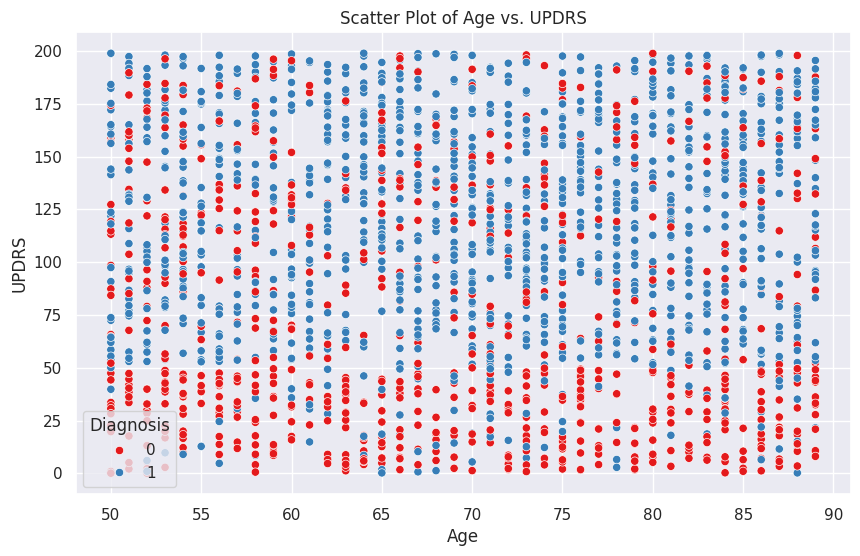

In [ ]:
# Scatter plot of Age vs. UPDRS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='UPDRS', hue='Diagnosis', data=data, palette='Set1')
plt.title('Scatter Plot of Age vs. UPDRS')
plt.xlabel('Age')
plt.ylabel('UPDRS')
plt.legend(title='Diagnosis')
plt.show()

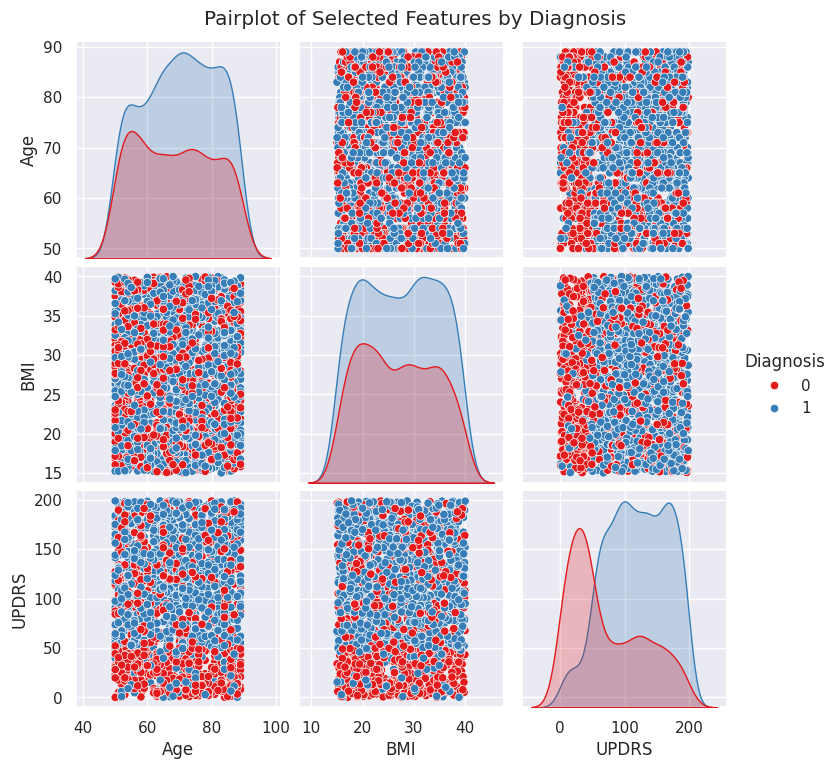

In [ ]:
# Pairplot for selected features
pairplot_features = ['Age', 'BMI', 'UPDRS']
if 'Diagnosis' in data.columns:
    sns.pairplot(data[pairplot_features + ['Diagnosis']], hue='Diagnosis', palette='Set1')
    plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
    plt.show()
else:
    print("'Diagnosis' column not found in the DataFrame.")

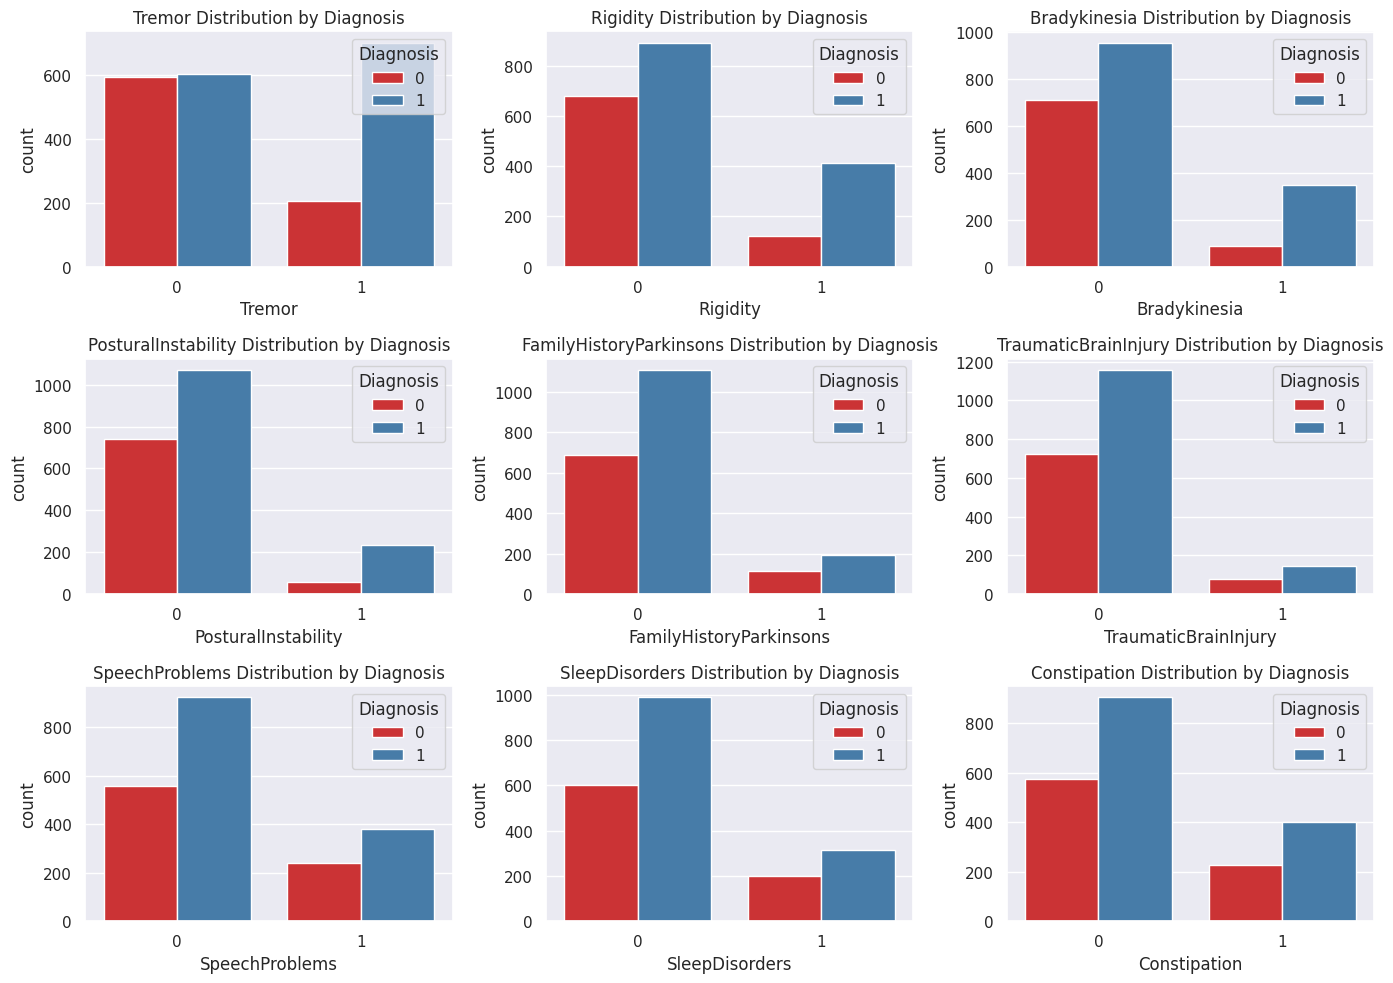

In [ ]:
# Select binary features and target variable
binary_features = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'FamilyHistoryParkinsons','TraumaticBrainInjury','SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']

eda_data = data[binary_features]

# 1. Bar Plots for Feature Counts by Target
plt.figure(figsize=(14, 10))
for i, feature in enumerate(binary_features[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, hue='Diagnosis', data=eda_data, palette='Set1')
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.legend(title='Diagnosis', loc='upper right')
plt.tight_layout()
plt.show()

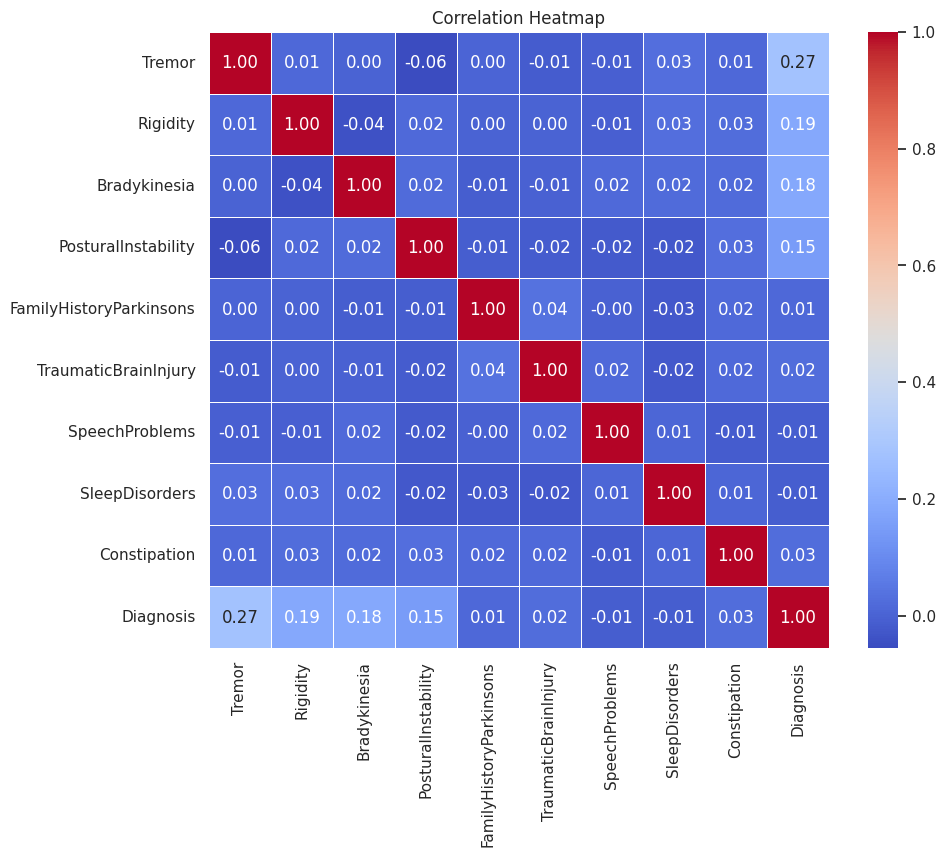

In [ ]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

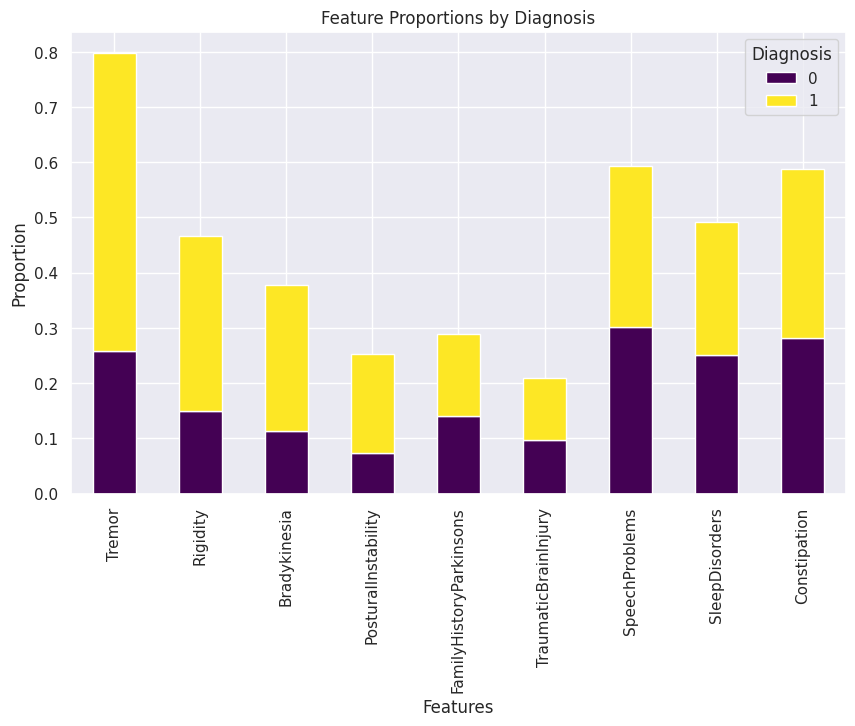

In [ ]:
# 3. Stacked Bar Chart
stacked_data = eda_data.groupby('Diagnosis').mean()
stacked_data.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Feature Proportions by Diagnosis")
plt.xlabel("Features")
plt.ylabel("Proportion")
plt.legend(title="Diagnosis")
plt.show()

In [ ]:
# Prepare features (X) and target (y)
X = data.drop(columns=['Diagnosis'])  # Features
y = data['Diagnosis']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report, confusion_matrix

**LOGISTIC REGRESSION (BEFORE FINE-TUNING)**


Train Accuracy (Before): 0.8307600950118765

Test Accuracy (Before): 0.7767220902612827

Test Recall (Before): 0.8450184501845018

Test AUC (Before): 0.879360393603936

Classification Report (Before):
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       150
           1       0.81      0.85      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.75      0.75       421
weighted avg       0.77      0.78      0.77       421


Confusion Matrix (Before):
[[ 98  52]
 [ 42 229]]


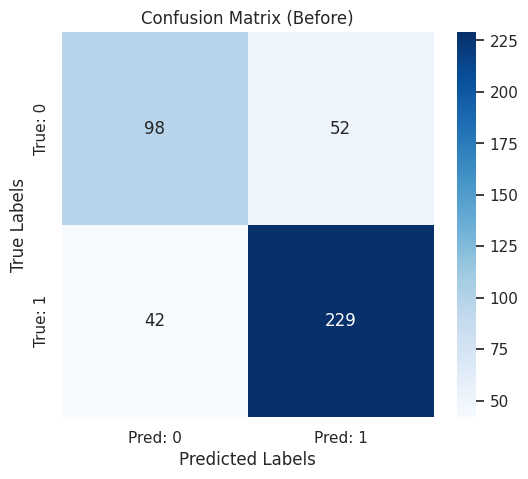

In [ ]:
# Train a Logistic Regression model without fine-tuning
log_reg_model_before = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model_before.fit(X_train_scaled, y_train)

# Train Accuracy (Before)
train_accuracy_before = accuracy_score(y_train, log_reg_model_before.predict(X_train_scaled))
print("\nTrain Accuracy (Before):", train_accuracy_before)

# Predict on the test set
y_pred_before = log_reg_model_before.predict(X_test_scaled)

# Test Accuracy (Before)
test_accuracy_before = accuracy_score(y_test, y_pred_before)
print("\nTest Accuracy (Before):", test_accuracy_before)

# Test Recall (Before)
test_recall_before = recall_score(y_test, y_pred_before)
print("\nTest Recall (Before):", test_recall_before)

# Test AUC (Area Under the Curve) (Before)
test_auc_before = roc_auc_score(y_test, log_reg_model_before.predict_proba(X_test_scaled)[:, 1])
print("\nTest AUC (Before):", test_auc_before)

# Detailed classification report (Before)
print("\nClassification Report (Before):")
print(classification_report(y_test, y_pred_before))

# Confusion matrix (Before)
conf_matrix_LR_before = confusion_matrix(y_test, y_pred_before)
print("\nConfusion Matrix (Before):")
print(conf_matrix_LR_before)

# Plotting Confusion Matrix (Before)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_LR_before, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Confusion Matrix (Before)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**LOGISTIC REGRESSION (AFTER FINE-TUNING)**


Train Accuracy (After): 0.831353919239905

Test Accuracy (After): 0.7790973871733967

Test Recall (After): 0.8487084870848709

Test AUC (After): 0.8797785977859779

Classification Report (After):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       150
           1       0.82      0.85      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.75      0.76       421
weighted avg       0.78      0.78      0.78       421


Confusion Matrix (After):
[[ 98  52]
 [ 41 230]]


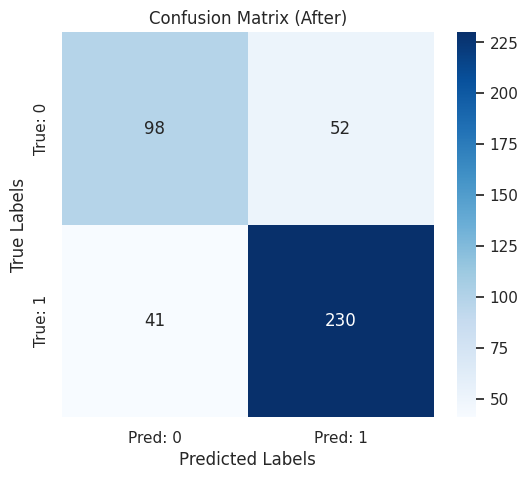

In [ ]:
# Train the Logistic Regression model again with fine-tuning

#4. Experiment with Solvers:
log_reg_model_after = LogisticRegression(solver='saga', penalty='l1', max_iter=1000, random_state=42)

log_reg_model_after.fit(X_train_scaled, y_train)

# Train Accuracy (After)
train_accuracy_after = accuracy_score(y_train, log_reg_model_after.predict(X_train_scaled))
print("\nTrain Accuracy (After):", train_accuracy_after)

# Predict on the test set
y_pred_after = log_reg_model_after.predict(X_test_scaled)

# Test Accuracy (After)
test_accuracy_after = accuracy_score(y_test, y_pred_after)
print("\nTest Accuracy (After):", test_accuracy_after)

# Test Recall (After)
test_recall_after = recall_score(y_test, y_pred_after)
print("\nTest Recall (After):", test_recall_after)

# Test AUC (Area Under the Curve) (After)
test_auc_after = roc_auc_score(y_test, log_reg_model_after.predict_proba(X_test_scaled)[:, 1])
print("\nTest AUC (After):", test_auc_after)

# Detailed classification report (After)
print("\nClassification Report (After):")
print(classification_report(y_test, y_pred_after))

# Confusion matrix (After)
conf_matrix_LR_after = confusion_matrix(y_test, y_pred_after)
print("\nConfusion Matrix (After):")
print(conf_matrix_LR_after)

# Plotting Confusion Matrix (After)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_LR_after, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Confusion Matrix (After)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**NAIVE BAYES (BEFORE FINE-TUNING)**


Train Accuracy (Before): 0.8081947743467933

Test Accuracy (Before): 0.7790973871733967

Test Recall (Before): 0.8154981549815498

Test AUC (Before): 0.8659778597785978

Classification Report (Before):
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       150
           1       0.84      0.82      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.76      0.76       421
weighted avg       0.78      0.78      0.78       421


Confusion Matrix (Before):
[[107  43]
 [ 50 221]]


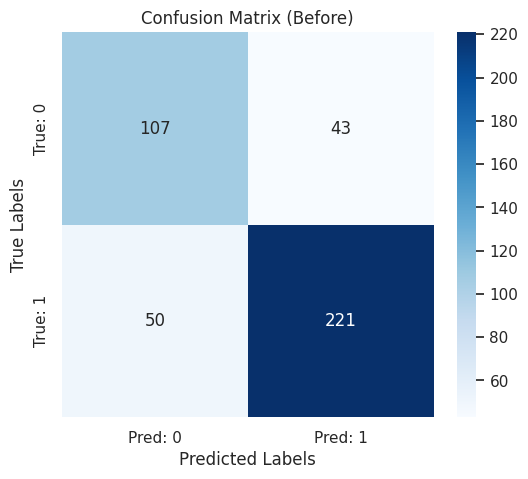


True Labels (Before): [0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 0]
Predicted Labels (Before): [1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Import GaussianNB

from sklearn.naive_bayes import GaussianNB # This line is added to import the GaussianNB class
# Train a Naive Bayes model (Before fine-tuning)
nb_model_before = GaussianNB()
nb_model_before.fit(X_train_scaled, y_train)

# Train Accuracy (Before)
train_accuracy_before = accuracy_score(y_train, nb_model_before.predict(X_train_scaled))
print("\nTrain Accuracy (Before):", train_accuracy_before)

# Predict on the test set
y_pred_nb_before = nb_model_before.predict(X_test_scaled)

# Test Accuracy (Before)
test_accuracy_before = accuracy_score(y_test, y_pred_nb_before)
print("\nTest Accuracy (Before):", test_accuracy_before)

# Test Recall (Before)
test_recall_before = recall_score(y_test, y_pred_nb_before)
print("\nTest Recall (Before):", test_recall_before)

# Test AUC (Area Under the Curve) (Before)
test_auc_before = roc_auc_score(y_test, nb_model_before.predict_proba(X_test_scaled)[:, 1])
print("\nTest AUC (Before):", test_auc_before)

# Detailed classification report (Before)
print("\nClassification Report (Before):")
print(classification_report(y_test, y_pred_nb_before))

# Confusion matrix (Before)
conf_matrix_NB_before = confusion_matrix(y_test, y_pred_nb_before)
print("\nConfusion Matrix (Before):")
print(conf_matrix_NB_before)

# Plotting Confusion Matrix (Before)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_NB_before, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Confusion Matrix (Before)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print True Labels and Predicted Labels (Before)
print("\nTrue Labels (Before):", y_test.values)
print("Predicted Labels (Before):", y_pred_nb_before)

**NAIVE BAYES (AFTER FINE-TUNING)**


Train Accuracy (After): 0.7642517814726841

Test Accuracy (After): 0.7268408551068883

Test Recall (After): 0.6531365313653137

Test AUC (After): 0.8659778597785978

Classification Report (After):
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       150
           1       0.89      0.65      0.75       271

    accuracy                           0.73       421
   macro avg       0.74      0.76      0.72       421
weighted avg       0.78      0.73      0.73       421


Confusion Matrix (After):
[[129  21]
 [ 94 177]]


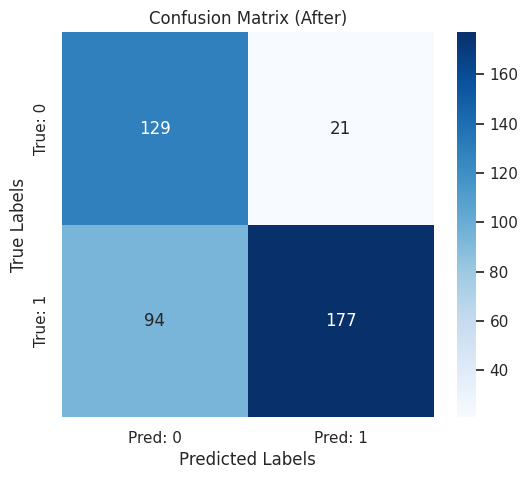


True Labels (After): [0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 0]
Predicted Labels (After): [1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1
 1 0 0 1 1 1 1 1 1 1 0

In [ ]:
# Apply fine-tuning

nb_model_after = GaussianNB(priors=[0.6, 0.4])  # Example of tuning priors (you can tune other params as well)
nb_model_after.fit(X_train_scaled, y_train)

# Train Accuracy (After)
train_accuracy_after = accuracy_score(y_train, nb_model_after.predict(X_train_scaled))
print("\nTrain Accuracy (After):", train_accuracy_after)

# Predict on the test set
y_pred_nb_after = nb_model_after.predict(X_test_scaled)

# Test Accuracy (After)
test_accuracy_after = accuracy_score(y_test, y_pred_nb_after)
print("\nTest Accuracy (After):", test_accuracy_after)

# Test Recall (After)
test_recall_after = recall_score(y_test, y_pred_nb_after)
print("\nTest Recall (After):", test_recall_after)

# Test AUC (Area Under the Curve) (After)
test_auc_after = roc_auc_score(y_test, nb_model_after.predict_proba(X_test_scaled)[:, 1])
print("\nTest AUC (After):", test_auc_after)

# Detailed classification report (After)
print("\nClassification Report (After):")
print(classification_report(y_test, y_pred_nb_after))

# Confusion matrix (After)
conf_matrix_NB_after = confusion_matrix(y_test, y_pred_nb_after)
print("\nConfusion Matrix (After):")
print(conf_matrix_NB_after)

# Plotting Confusion Matrix (After)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_NB_after, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Confusion Matrix (After)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print True Labels and Predicted Labels (After)
print("\nTrue Labels (After):", y_test.values)
print("Predicted Labels (After):", y_pred_nb_after)

**SVM (BEFORE FINE-TUNING)**


Train SVM Accuracy (Before): 0.9418052256532067

Test SVM Accuracy (Before): 0.7838479809976246

Test SVM Recall (Before): 0.8560885608856088

Test SVM AUC (Before): 0.8780565805658056

SVM Test AUC (Before): 0.8780565805658056

SVM Classification Report (Before):
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       150
           1       0.82      0.86      0.84       271

    accuracy                           0.78       421
   macro avg       0.77      0.75      0.76       421
weighted avg       0.78      0.78      0.78       421


SVM Confusion Matrix (Before):
[[ 98  52]
 [ 39 232]]


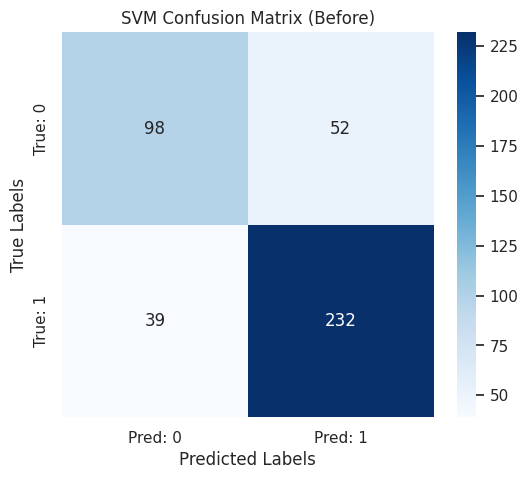

In [ ]:
from sklearn.svm import SVC

#train the svm model with default parameters
svm_model_before =  SVC(probability=True, random_state=42)
svm_model_before.fit(X_train_scaled, y_train)   #fit trains the model on the training dataset (X_train_scaled and y_train).

#train the accuracy (before)
train_accuracy_before = accuracy_score(y_train, svm_model_before.predict(X_train_scaled))
print("\nTrain SVM Accuracy (Before):", train_accuracy_before)

#predict on the test set
y_pred_svm_before = svm_model_before.predict(X_test_scaled)

#test the accuracy (before)
test_accuracy_before = accuracy_score(y_test, y_pred_svm_before)
print("\nTest SVM Accuracy (Before):", test_accuracy_before)

#test recall (before)
test_recall_before = recall_score(y_test, y_pred_svm_before)
print("\nTest SVM Recall (Before):", test_recall_before)

#test area under the curve AUC (before)
test_auc_before = roc_auc_score(y_test, svm_model_before.predict_proba(X_test_scaled)[:, 1])
print("\nTest SVM AUC (Before):", test_auc_before)

#classification report (before)
test_auc_before = roc_auc_score(y_test, svm_model_before.predict_proba(X_test_scaled)[:, 1])
print("\nSVM Test AUC (Before):", test_auc_before)

# Classification Report (Before)
print("\nSVM Classification Report (Before):")
print(classification_report(y_test, y_pred_svm_before))

# Confusion Matrix (Before)
conf_matrix_svm_before = confusion_matrix(y_test, y_pred_svm_before)
print("\nSVM Confusion Matrix (Before):")
print(conf_matrix_svm_before)

# Plotting Confusion Matrix (Before)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm_before, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('SVM Confusion Matrix (Before)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**SVM (AFTER FINE-TUNING)**


SVM Train Accuracy (After): 0.7802850356294537

SVM Test Accuracy (After): 0.7814726840855107

SVM Test Recall (After): 0.8450184501845018

SVM Test AUC (After): 0.8721279212792128

SVM Classification Report (After):
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       150
           1       0.82      0.85      0.83       271

    accuracy                           0.78       421
   macro avg       0.76      0.76      0.76       421
weighted avg       0.78      0.78      0.78       421


SVM Confusion Matrix (After):
[[100  50]
 [ 42 229]]


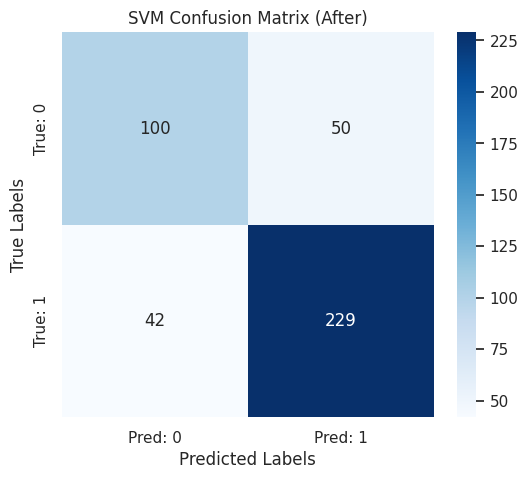

In [ ]:
# Train an SVM model with fine-tuned hyperparameters

#C=1: Adjusts the trade-off between accuracy on the training data and generalization to unseen data. Higher values = less regularization.
#kernel='rbf': Uses a radial basis function kernel (non-linear decision boundaries).
#gamma='scale': Automatically adjusts how far-reaching each data point’s influence is.
svm_model_after = SVC(C=1.0, kernel='sigmoid', gamma='scale', probability=True, random_state=42)
svm_model_after.fit(X_train_scaled, y_train)


#repeat the same steps (evaluation)

# Train Accuracy (After)
train_accuracy_after = accuracy_score(y_train, svm_model_after.predict(X_train_scaled))
print("\nSVM Train Accuracy (After):", train_accuracy_after)

# Predict on the test set
y_pred_svm_after = svm_model_after.predict(X_test_scaled)

# Test Accuracy (After)
test_accuracy_after = accuracy_score(y_test, y_pred_svm_after)
print("\nSVM Test Accuracy (After):", test_accuracy_after)

# Test Recall (After)
test_recall_after = recall_score(y_test, y_pred_svm_after)
print("\nSVM Test Recall (After):", test_recall_after)

# Test AUC (Area Under the Curve) (After)
test_auc_after = roc_auc_score(y_test, svm_model_after.predict_proba(X_test_scaled)[:, 1])
print("\nSVM Test AUC (After):", test_auc_after)

# Classification Report (After)
print("\nSVM Classification Report (After):")
print(classification_report(y_test, y_pred_svm_after))

# Confusion Matrix (After)
conf_matrix_svm_after = confusion_matrix(y_test, y_pred_svm_after)
print("\nSVM Confusion Matrix (After):")
print(conf_matrix_svm_after)

# Plotting Confusion Matrix (After)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm_after, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('SVM Confusion Matrix (After)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**GRADIENT BOOSTING (BEFORE FINE-TUNING)**


Gradient Boosting Train Accuracy (Before): 0.9703087885985748
Gradient Boosting Test Accuracy (Before): 0.9073634204275535
Gradient Boosting Recall (Before): 0.9114391143911439
Gradient Boosting AUC (Before): 0.9540098400984011

Gradient Boosting Classification Report (Before):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       150
           1       0.94      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.90       421
weighted avg       0.91      0.91      0.91       421



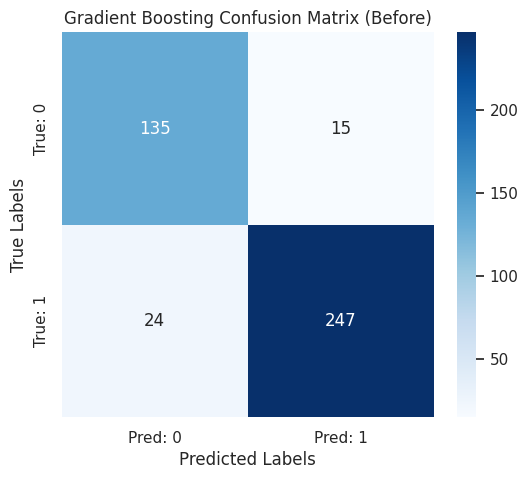

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model without fine-tuning
gb_model_before = GradientBoostingClassifier(random_state=42)
gb_model_before.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_gb_before = gb_model_before.predict(X_test_scaled)

# Evaluate the model
gb_train_accuracy_before = accuracy_score(y_train, gb_model_before.predict(X_train_scaled))
gb_test_accuracy_before = accuracy_score(y_test, y_pred_gb_before)
gb_recall_before = recall_score(y_test, y_pred_gb_before)
gb_auc_before = roc_auc_score(y_test, gb_model_before.predict_proba(X_test_scaled)[:, 1])

print("\nGradient Boosting Train Accuracy (Before):", gb_train_accuracy_before)
print("Gradient Boosting Test Accuracy (Before):", gb_test_accuracy_before)
print("Gradient Boosting Recall (Before):", gb_recall_before)
print("Gradient Boosting AUC (Before):", gb_auc_before)

# Classification report and confusion matrix
print("\nGradient Boosting Classification Report (Before):")
print(classification_report(y_test, y_pred_gb_before))

conf_matrix_gb_before = confusion_matrix(y_test, y_pred_gb_before)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb_before, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Gradient Boosting Confusion Matrix (Before)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**GRADIENT BOOSTING (AFTER FINE-TUNING)**


Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Gradient Boosting Train Accuracy (After): 1.0
Gradient Boosting Test Accuracy (After): 0.9263657957244655
Gradient Boosting Recall (After): 0.922509225092251
Gradient Boosting AUC (After): 0.959040590405904

Gradient Boosting Classification Report (After):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       150
           1       0.96      0.92      0.94       271

    accuracy                           0.93       421
   macro avg       0.92      0.93      0.92       421
weighted avg       0.93      0.93      0.93       421



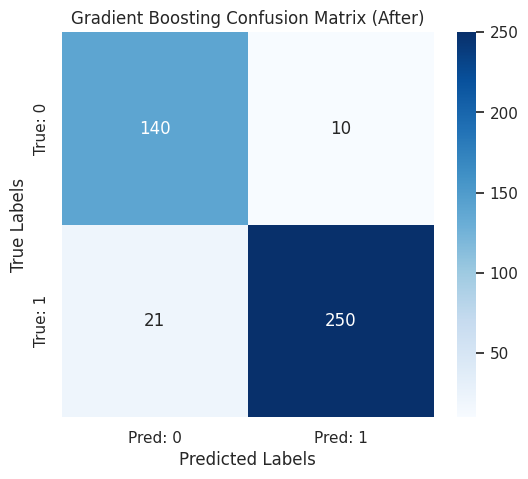

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearch for fine-tuning
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

# Best parameters and estimator
best_gb_model = grid_search_gb.best_estimator_
print("\nBest Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Predictions with the fine-tuned model
y_pred_gb_after = best_gb_model.predict(X_test_scaled)

# Evaluate the fine-tuned model
gb_train_accuracy_after = accuracy_score(y_train, best_gb_model.predict(X_train_scaled))
gb_test_accuracy_after = accuracy_score(y_test, y_pred_gb_after)
gb_recall_after = recall_score(y_test, y_pred_gb_after)
gb_auc_after = roc_auc_score(y_test, best_gb_model.predict_proba(X_test_scaled)[:, 1])

print("\nGradient Boosting Train Accuracy (After):", gb_train_accuracy_after)
print("Gradient Boosting Test Accuracy (After):", gb_test_accuracy_after)
print("Gradient Boosting Recall (After):", gb_recall_after)
print("Gradient Boosting AUC (After):", gb_auc_after)

# Classification report and confusion matrix
print("\nGradient Boosting Classification Report (After):")
print(classification_report(y_test, y_pred_gb_after))

conf_matrix_gb_after = confusion_matrix(y_test, y_pred_gb_after)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gb_after, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Gradient Boosting Confusion Matrix (After)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**XGBOOST (BEFORE-TUNNING)**

Default XGBoost Model (Before Tuning):
Train Accuracy: 1.0
Test Accuracy: 0.9144893111638955
Recall: 0.9077490774907749
AUC: 0.9576875768757688
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       150
           1       0.96      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.92       421



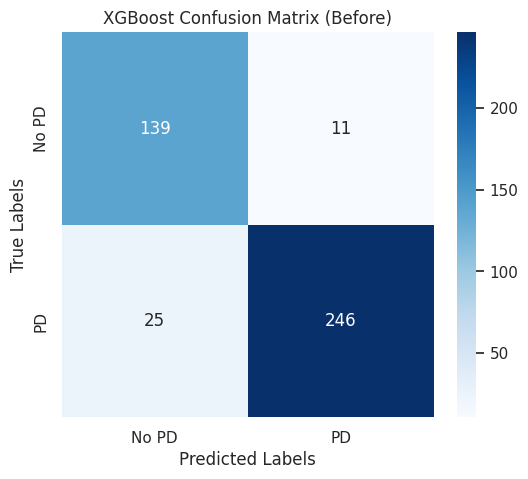

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Default XGBoost (before tuning)
xgb_default = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_default.fit(X_train_scaled, y_train)

# Train and test accuracy (before tuning)
train_acc_default = accuracy_score(y_train, xgb_default.predict(X_train_scaled))
test_acc_default = accuracy_score(y_test, xgb_default.predict(X_test_scaled))

# Recall and AUC (before tuning)
recall_default = recall_score(y_test, xgb_default.predict(X_test_scaled))
auc_default = roc_auc_score(y_test, xgb_default.predict_proba(X_test_scaled)[:, 1])

print("Default XGBoost Model (Before Tuning):")
print(f"Train Accuracy: {train_acc_default}")
print(f"Test Accuracy: {test_acc_default}")
print(f"Recall: {recall_default}")
print(f"AUC: {auc_default}")

# Predictions and evaluation (before tuning)
y_pred_default = xgb_default.predict(X_test_scaled)
print(classification_report(y_test, y_pred_default))

# Confusion matrix (before tuning)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_default, annot=True, fmt="d", cmap="Blues", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"])
plt.title("XGBoost Confusion Matrix (Before)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**XGBOOST (AFTER-TUNNING)**

Tuned XGBoost Model (After Tuning):
Train Accuracy: 1.0
Test Accuracy: 0.9287410926365796
Recall: 0.9188191881918819
AUC: 0.9577613776137762
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       150
           1       0.97      0.92      0.94       271

    accuracy                           0.93       421
   macro avg       0.92      0.93      0.92       421
weighted avg       0.93      0.93      0.93       421



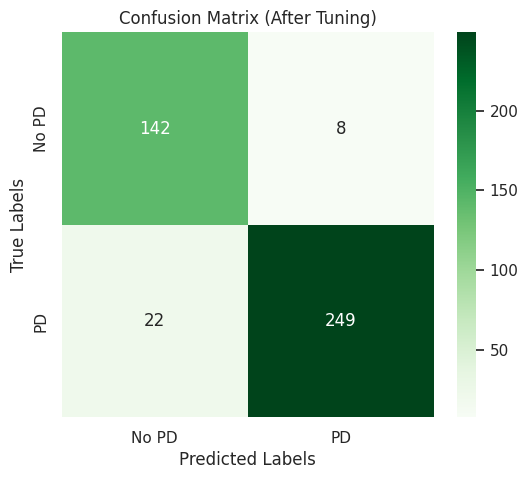

In [ ]:
# Manual Grid Search (after tuning)
param_grid = {
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 150],
}

best_model = None
best_score = 0

for lr in param_grid["learning_rate"]:
    for depth in param_grid["max_depth"]:
        for n in param_grid["n_estimators"]:
            model = XGBClassifier(learning_rate=lr, max_depth=depth, n_estimators=n, eval_metric="logloss", random_state=42)
            model.fit(X_train_scaled, y_train)
            score = accuracy_score(y_test, model.predict(X_test_scaled))

            if score > best_score:
                best_score = score
                best_model = model

# Train and test accuracy (after tuning)
train_acc_tuned = accuracy_score(y_train, best_model.predict(X_train_scaled))
test_acc_tuned = accuracy_score(y_test, best_model.predict(X_test_scaled))

# Recall and AUC (after tuning)
recall_tuned = recall_score(y_test, best_model.predict(X_test_scaled))
auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

print("Tuned XGBoost Model (After Tuning):")
print(f"Train Accuracy: {train_acc_tuned}")
print(f"Test Accuracy: {test_acc_tuned}")
print(f"Recall: {recall_tuned}")
print(f"AUC: {auc_tuned}")

# Predictions and evaluation (after tuning)
y_pred_tuned = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix (after tuning)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tuned, annot=True, fmt="d", cmap="Greens", xticklabels=["No PD", "PD"], yticklabels=["No PD", "PD"])
plt.title("XGBoost Confusion Matrix (After)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()